In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Correct file path for macOS or Linux
file_path = '/Users/shukla/Downloads/Telco-Customer-Churn.csv'
# Load the dataset
df = pd.read_csv(file_path)

# Preview the data
print(df.head())
print(df.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [22]:
# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Convert 'Churn' column to binary
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Inspect the cleaned data
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7032.000000  7032.000000     7032.000000   7032.000000  7032.000000
mean        0.162400    32.421786       64.798208   2283.300441     0.265785
std         0.368844    24.545260       30.085974   2266.771362     0.441782
min         0.000000     1.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.587500    401.450000     0.000000
50%         0.000000    29.000000       70.350000   1397.475000     0.000000
75%         0.000000    55.000000       89.862500   3794.737500     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000


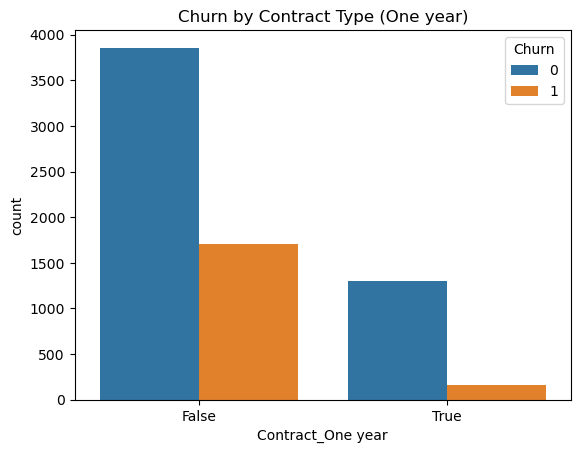

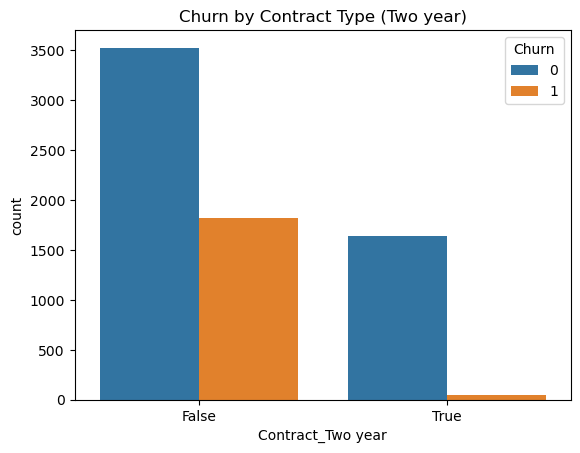

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting churn distribution for 'Contract_One year'
sns.countplot(data=df, x='Contract_One year', hue='Churn')
plt.title('Churn by Contract Type (One year)')
plt.show()

# Alternatively, plotting for 'Contract_Two year'
sns.countplot(data=df, x='Contract_Two year', hue='Churn')
plt.title('Churn by Contract Type (Two year)')
plt.show()



In [24]:
# Calculate churn rates for 'Contract_One year' and 'Contract_Two year'
contract_churn = df.groupby(['Contract_One year', 'Contract_Two year'])['Churn'].mean()
print("Churn rates by contract type:\n", contract_churn)



Churn rates by contract type:
 Contract_One year  Contract_Two year
False              False                0.427097
                   True                 0.028487
True               False                0.112772
Name: Churn, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.62      0.55      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110

Confusion Matrix:
 [[1360  189]
 [ 250  311]]


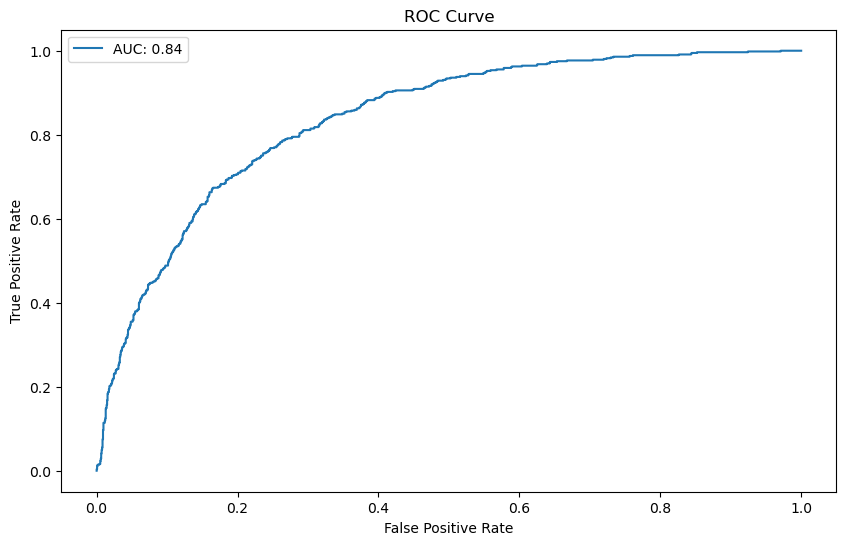

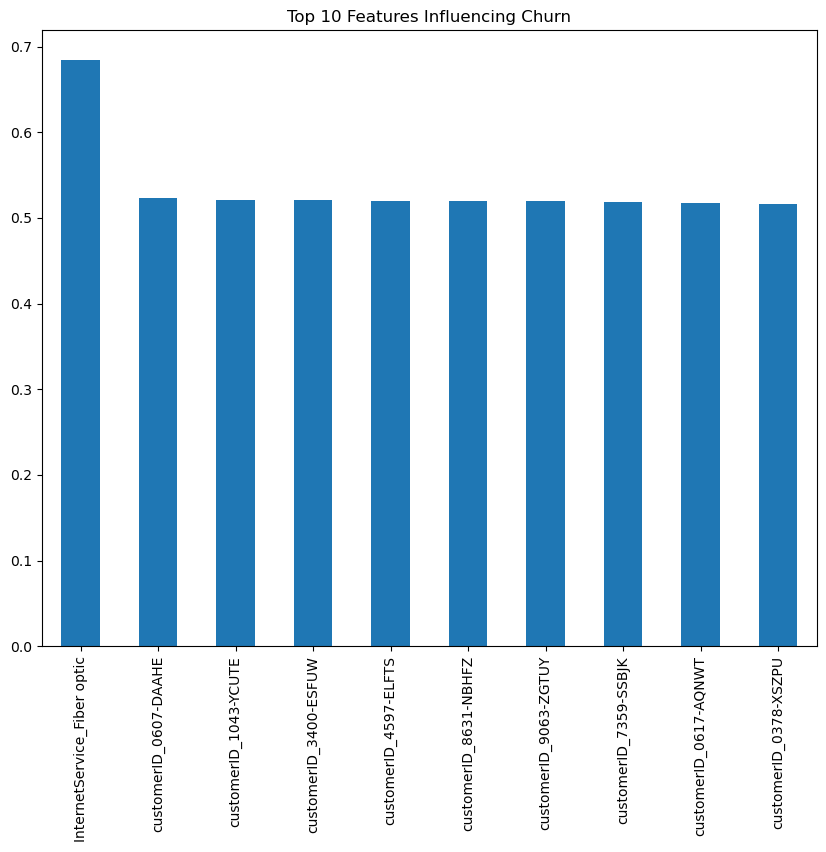

In [27]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
# Feature importance for Logistic Regression
importance = pd.Series(log_reg.coef_[0], index=X.columns)
importance.sort_values(ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 8))
importance[:10].plot(kind='bar')
plt.title('Top 10 Features Influencing Churn')
plt.show()
